#  モデル構築のための特徴量作成

本章では、機械学習モデルの構築に必要な特徴量作成の例として実装を行います。  
ここでは事前学習などでは扱えなかった高度な集計の方法や、特徴量作成時のポイント（処理を関数化しておくこと）などに触れます。  

PBL 期間ではこのあたりの実装を自身で考えて取り組む必要があるためここでの実装を今後のヒントにしてみてください。 

**本章の目的**  

* データ前処理の復習  
* データ前処理の重要性や考え方を理解する  

**本章で使用するデータ**  

* [Adult Gesus Dataset](data/adult.csv)

## データの読み込みと確認  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,marital-group
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Widowed
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Widowed
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Widowed


**取り組んでみましょう**  
```markdown
今回のデータセットにおける必要な前処理を考えます。  
今回のデータセットにおける機械学習実装での不都合な点は何が有るでしょうか？
```  





## 【参考】 前処理のためのデータ確認（基礎編）

取り合えす、最低限実装しておくべきデータの確認について記載しておきます。  
こちらは復習内容が大半ですので実装はしませんが、どうすれば何を確認できたのかは押さえておきましょう。  

In [ ]:
# 欠損値やデータの型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  object  
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  object  
 6   occupation      32561 non-null  object  
 7   relationship    32561 non-null  object  
 8   race            32561 non-null  object  
 9   sex             32561 non-null  object  
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  object  
 14  income          32561 non-null  object  
 15  marital-group   32561 non-null  category
dtypes: category(1), int64(6), object(9)
memory usage: 3.8+ MB


In [ ]:
# 数値データの分布の確認
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# カテゴリカル・データの概要確認  
df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


答え例    

- 欠損値が存在している  
- 欠損値が ? で記入されている  
- カテゴリのデータが存在する  
- 同じ意味を持つ変数が存在している  

## 前処理のためのデータ確認（発展編）  
ここからでは、前処理のためのデータ確認において発展的な実装を行います。  
前提として以下のコードは一例でありより効率的なコードを書くことはできると思います。  

ぜひ皆さんの PBL 期間では自身なりの工夫をして実装してみてください。  

In [ ]:
import seaborn as sns

In [ ]:
# カテゴリのカラムと数値のカラムの取得  

cat_cols = list(df.drop(['income'], axis=1).select_dtypes(include=['object']).columns)
print(f'カテゴリのカラム:{cat_cols}')

num_cols = list(df.drop(['income'], axis=1).select_dtypes(include=['int', 'float']).columns)
print(f'数値のカラム:{num_cols}')

カテゴリのカラム:['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
数値のカラム:['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


### 構成と分布を確認する  

In [ ]:
def get_count_plot(df, cols, hue=None, fig_hight=3, fig_width=3):
    for idx, col in enumerate(cols):
        plt.subplot(fig_hight, fig_width, idx + 1)
        if not hue:
            sns.countplot(y=col, data=df, order=df[col].value_counts().index);
        else:
            sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=hue);
        plt.tight_layout();

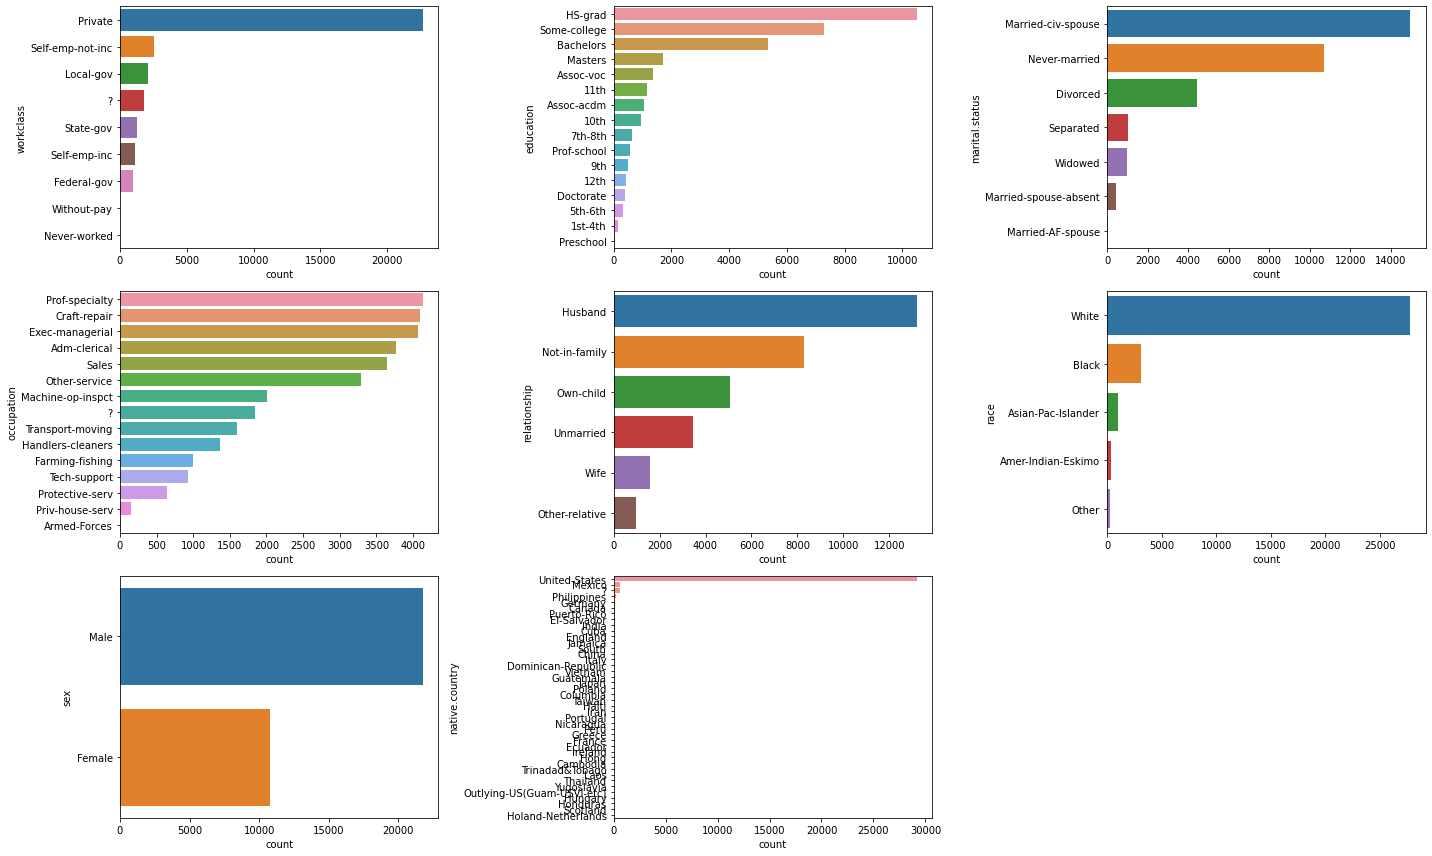

In [ ]:
plt.figure(figsize=(20, 12))
get_count_plot(df, cat_col)

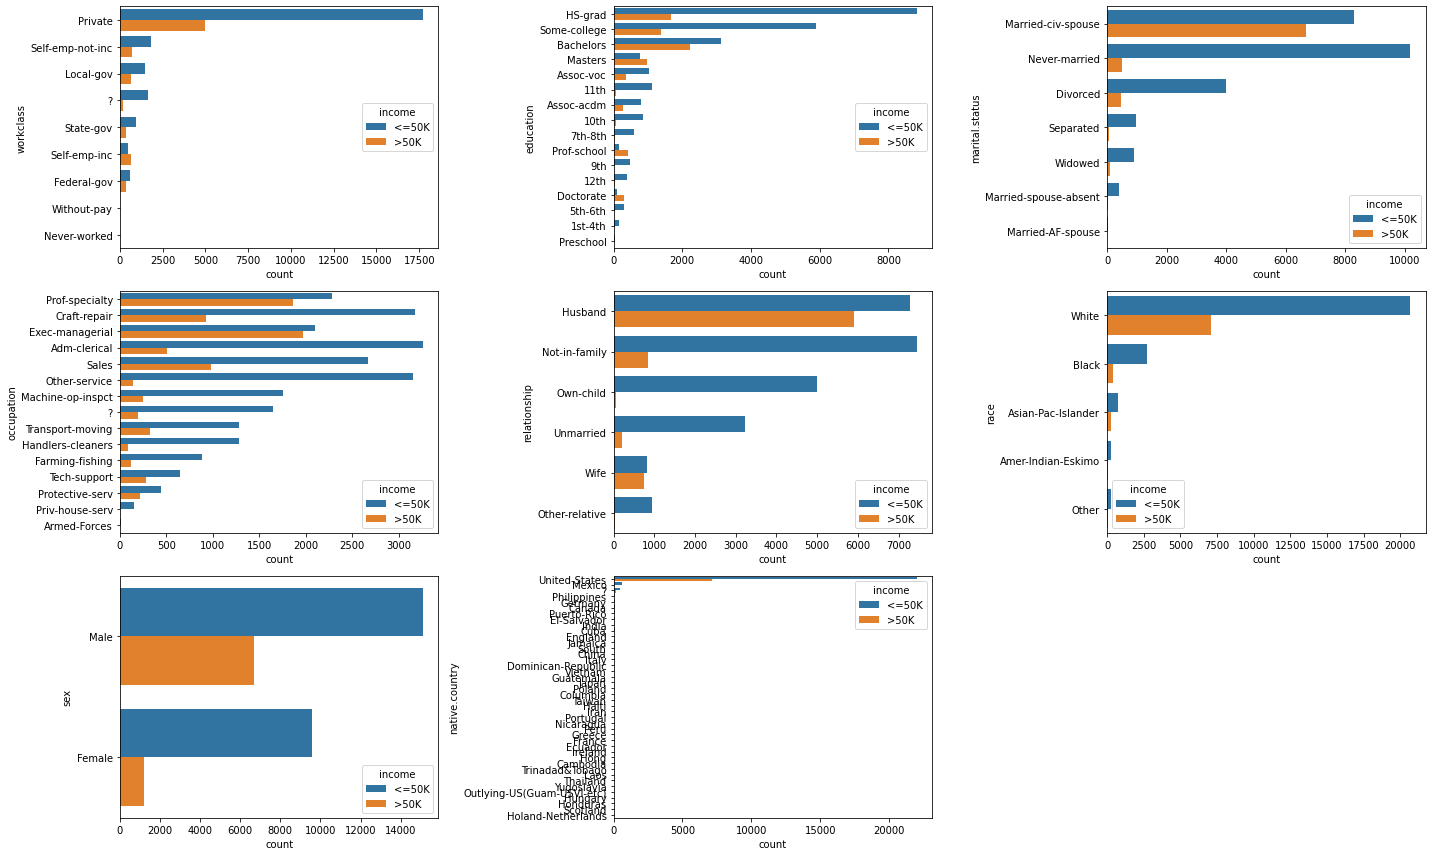

In [ ]:
plt.figure(figsize=(20, 12))
get_count_plot(df, cat_col, hue='income')

In [ ]:
def get_box_plot(df, cols, hue=None, fig_hight=3, fig_width=3):
    for idx, col in enumerate(cols):
        plt.subplot(fig_hight, fig_width, idx + 1)
        if not hue:
            sns.boxplot(x=col, data=df, showfliers=True);
        else:
            sns.boxplot(x=col, data=df, showfliers=True, y=hue);
        plt.tight_layout();

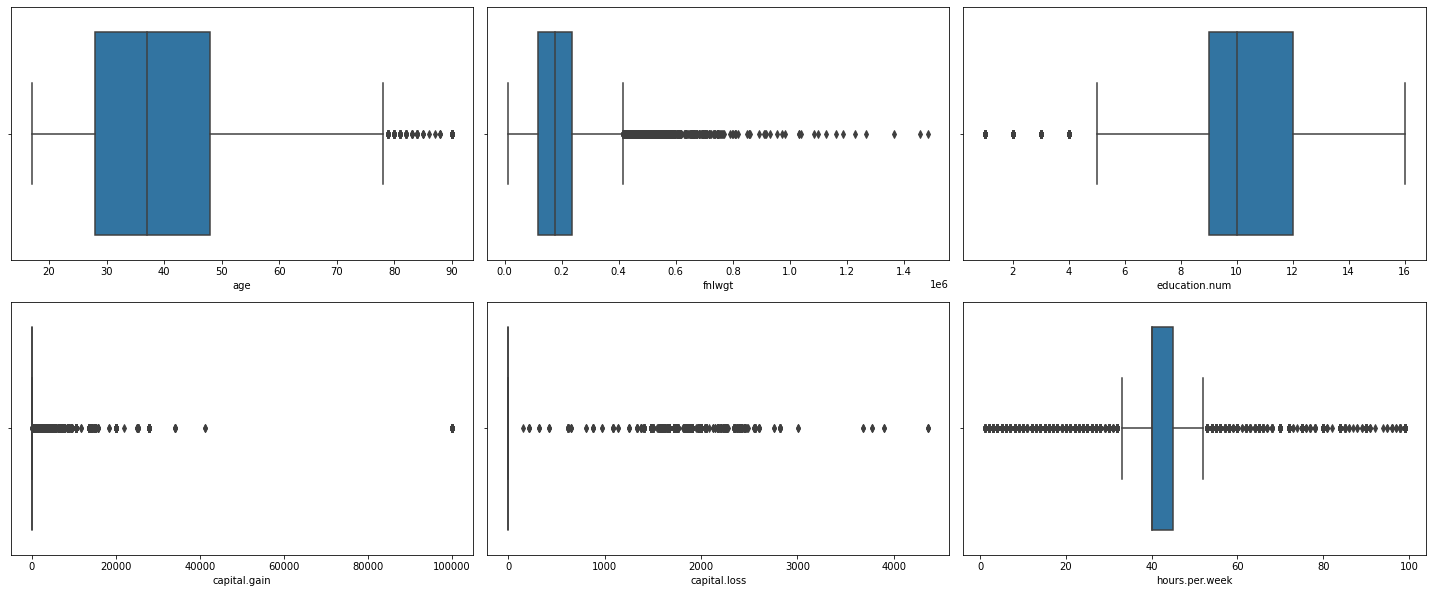

In [ ]:
plt.figure(figsize=(20, 12))
get_box_plot(df, num_cols)

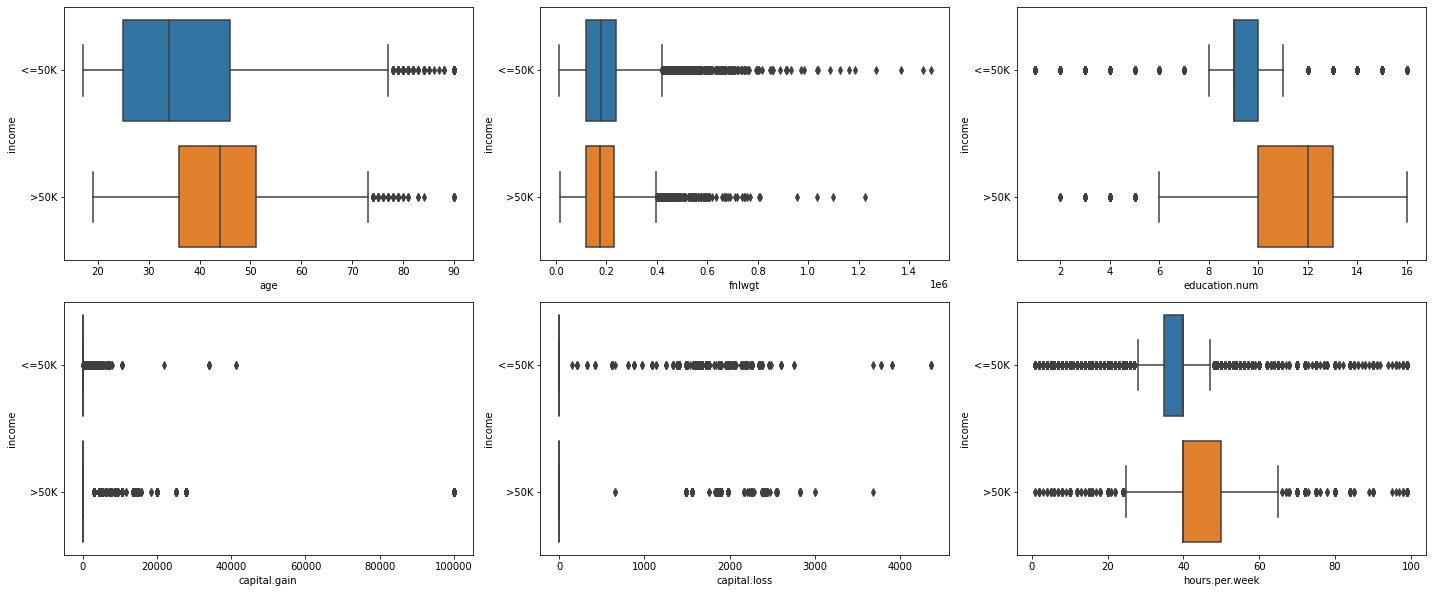

In [ ]:
plt.figure(figsize=(20, 12))
get_box_plot(df, num_cols, hue='income')

In [ ]:
def get_hist_plot(df, cols, hue=None, fig_hight=3, fig_width=3):
    for idx, col in enumerate(cols):
        plt.subplot(fig_hight, fig_width, idx + 1)
        if not hue:
            sns.histplot(x=col, data=df);
        else:
            sns.histplot(x=col, data=df, hue=hue);
        plt.tight_layout();

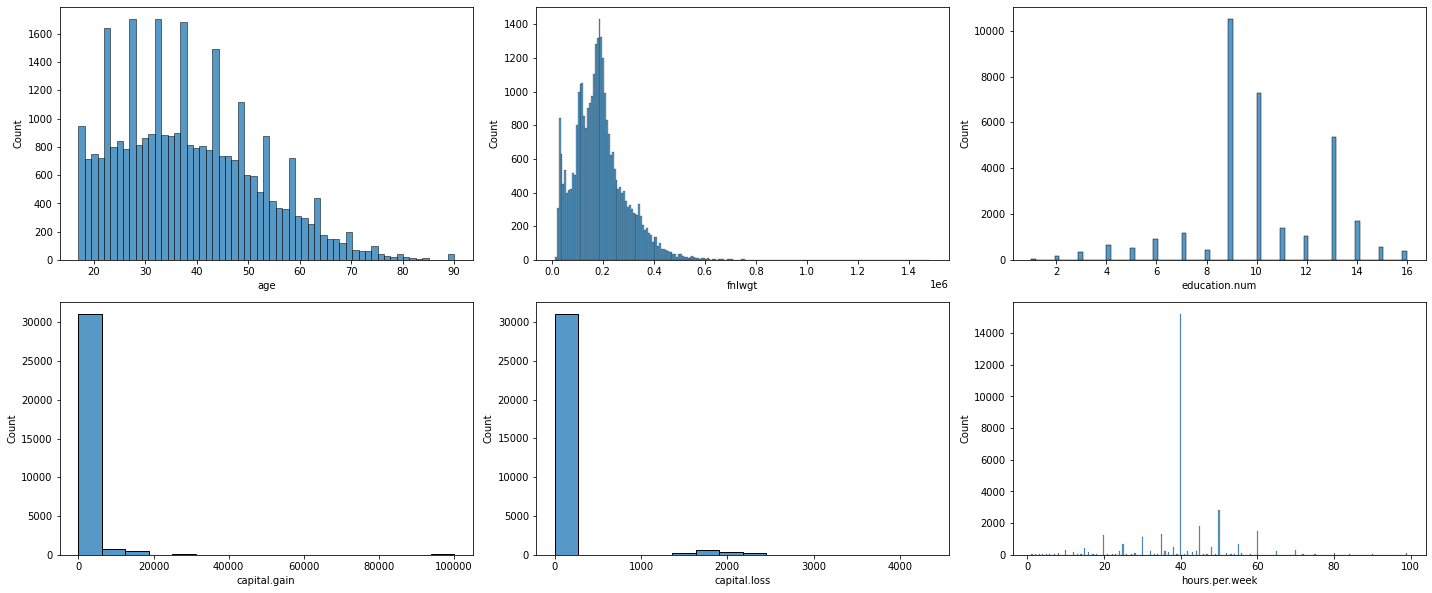

In [ ]:
plt.figure(figsize=(20, 12))
get_hist_plot(df, num_cols)

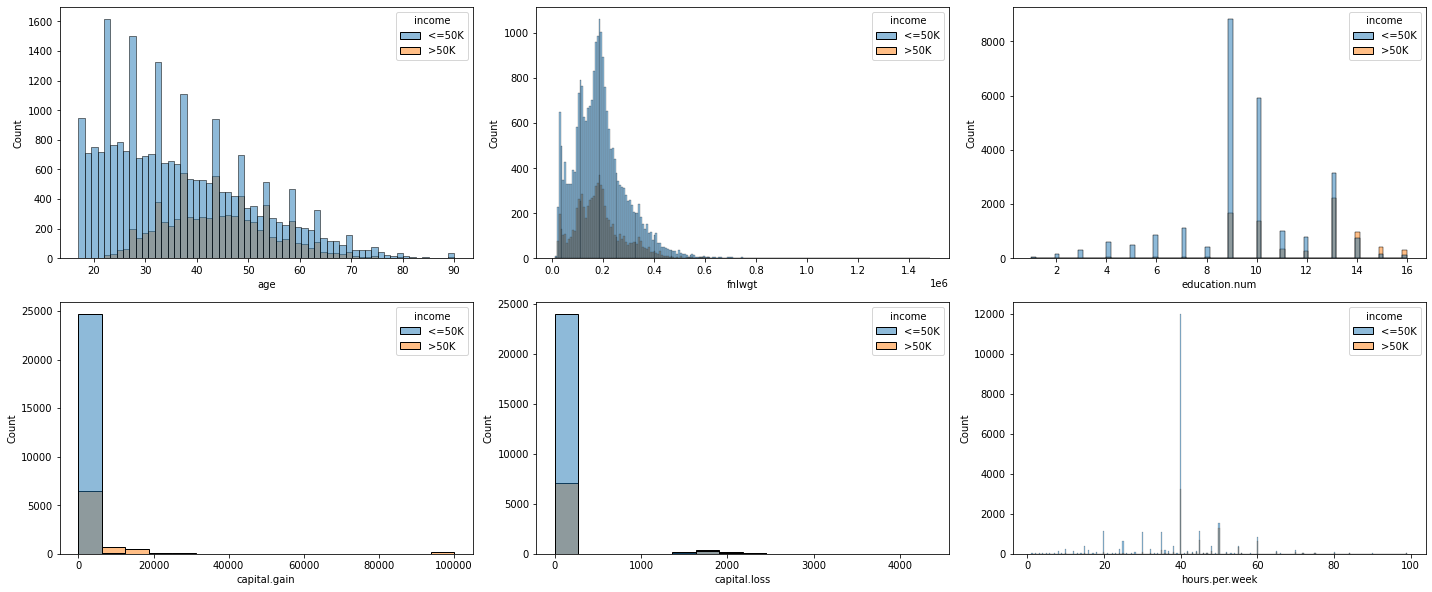

In [ ]:
plt.figure(figsize=(20, 12))
get_hist_plot(df, num_cols, hue='income')

### データの関連性を見る  

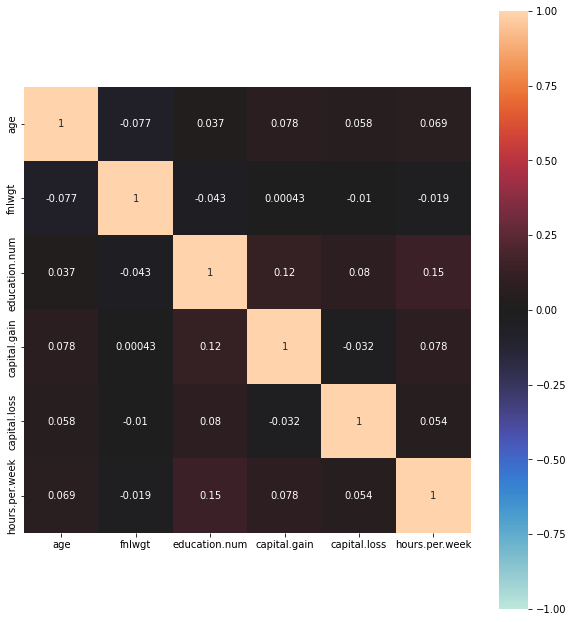

In [ ]:
plt.figure(figsize=(10, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1, center=0, square=True);

In [ ]:
# 補足：同じ意味を持つ変数の確認  
df[['education', 'education.num']].value_counts().reset_index().sort_values(by='education.num')

,education,education.num,0
15,Preschool,1,51
14,1st-4th,2,168
13,5th-6th,3,333
8,7th-8th,4,646
10,9th,5,514
7,10th,6,933
5,11th,7,1175
11,12th,8,433
0,HS-grad,9,10501
1,Some-college,10,7291


**取り組んでみましょう**  

```markdown
この後特徴量変換を実施するにあたって、どのような処理が必要か検討します。  
ここまでの実装の結果から行うべき処理はどのようなものが有るか考えましょう。  
```

## 特徴量変換

### 特徴量とは

予測変数に紐付いた説明変数のことを「特徴量」と呼びます。様々なアルゴリズムがが開発されていますが、アルゴリズムに入力するデータは人間が用意しなければいけません。この予測のもとになるデータを特徴量とよび、アルゴリズムが理解しやすい特徴量を作ることを **特徴量エンジニアリング**と呼びます。  

特徴量エンジニアリングの目的には大きく分けて以下の2つがあります。  

* 機械学習モデルが扱えるデータを用意する  
* 予測に用いるために最適なデータを用意する  

それぞれ実装しましょう。  

## 機械学習モデルが扱えるデータを用意する  

機械学習が理解できるのは基本的に数値の形式のみです。テキストや画像などを取り扱う場合もありますが、それらもピクセルの RGB や NLP の手法により、最終的に数値化されて機械学習へとインプットされています。数値への変換は人間の仕事です。  

### 不要な変数・データの削除やデータの補完

In [ ]:
df_fix = df.copy()

In [ ]:
# 重複行の削除  
df_fix.drop_duplicates(inplace=True)
len(df_fix)

32537

In [ ]:
# 確認  
df_fix['native.country'].value_counts(normalize=True).head(5)

United-States    0.895995
Mexico           0.019639
?                0.017887
Philippines      0.006085
Germany          0.004211
Name: native.country, dtype: float64

In [ ]:
df_fix.drop(['native.country', 'education', 'fnlwgt'], axis=1, inplace=True)
df_fix.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'marital-group'],
      dtype='object')

In [ ]:
# 欠損値を np.nan に置き換え
df_fix = df_fix.applymap(lambda var: np.nan if var=="?" else var)
df_fix.head(5)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,marital-group
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K,Widowed
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,Widowed
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K,Widowed
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,Separated
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,Separated


In [ ]:
df_fix.isnull().sum()

age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
marital-group        0
dtype: int64

## 予測に用いるために最適なデータを用意する

### カテゴリカル変数の変換


In [ ]:
marital_status_dict = {
  'Never-married': 'NotMarried',
  'Married-AF-spouse': 'Married',
  'Married-civ-spouse': 'Married',
  'Married-spouse-absent': 'Married',
  'Separated': 'Separated',
  'Divorced': 'Separated',
  'Widowed': 'Widowed'
}

In [ ]:
df_fix['marital-group'] = df_fix['marital.status'].map(marital_status_dict).astype('object')
df_fix['marital-group']

0           Widowed
1           Widowed
2           Widowed
3         Separated
4         Separated
            ...    
32556    NotMarried
32557       Married
32558       Married
32559       Widowed
32560    NotMarried
Name: marital-group, Length: 32537, dtype: object

In [ ]:
df_fix.drop('marital.status', axis=1, inplace=True)

今回はシンプルに変数をすべてを One-Hot に変換します。  

In [ ]:
df_fix.describe(include='object')

,workclass,occupation,relationship,race,sex,income,marital-group
count,30701,30694,32537,32537,32537,32537,32537
unique,8,14,6,5,2,2,4
top,Private,Prof-specialty,Husband,White,Male,<=50K,Married
freq,22673,4136,13187,27795,21775,24698,15411


In [ ]:
df_final = pd.get_dummies(df_fix.drop('income', axis=1))
df_final['target'] = df_fix['income']
df_final

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Black,race_Other,race_White,sex_Female,sex_Male,marital-group_Married,marital-group_NotMarried,marital-group_Separated,marital-group_Widowed,target
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,<=50K
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,<=50K
2,66,10,0,4356,40,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,<=50K
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,<=50K
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,<=50K
32557,27,12,0,0,38,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,<=50K
32558,40,9,0,0,40,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,>50K
32559,58,9,0,0,40,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,<=50K


## 特徴量エンジニアリングの関数化

In [ ]:
def preprocess(df, cols, target_col):
    marital_status_dict = {
        'Never-married': 'NotMarried',
        'Married-AF-spouse': 'Married',
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Separated': 'Separated',
        'Divorced': 'Separated',
        'Widowed': 'Widowed'
        }

    _df = df.applymap(lambda var: np.nan if var=="?" else var)
    _df['marital-group'] = _df['marital.status'].map(marital_status_dict).astype('object')
    _df = _df.drop(cols, axis=1)

    _df= pd.get_dummies(df.drop(target_col, axis=1))
    _df['target']  = df[taeget_col]

    return _df

In [ ]:
cols = ['marital.status', 'fnlwgt', 'native.country', 'education']
_df = preprocess(df, cols)

In [ ]:
_df

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K,marital-group_Married,marital-group_NotMarried,marital-group_Separated,marital-group_Widowed
0,90,9,0,4356,40,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
1,82,9,0,4356,18,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,54,4,0,3900,40,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,0,0,1,0,...,0,1,0,1,1,0,0,1,0,0
32557,27,12,0,0,38,0,0,0,1,0,...,0,1,1,0,1,0,1,0,0,0
32558,40,9,0,0,40,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
32559,58,9,0,0,40,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1


## 【復習】機械学習モデル構築

基本的な実装として決定木を用いた実装を行いましょう。  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x = df_final.drop('target', axis=1).values
t = df_final['target']

In [ ]:
x

array([[90,  9,  0, ...,  0,  0,  1],
       [82,  9,  0, ...,  0,  0,  1],
       [66, 10,  0, ...,  0,  0,  1],
       ...,
       [40,  9,  0, ...,  0,  0,  0],
       [58,  9,  0, ...,  0,  0,  1],
       [22,  9,  0, ...,  1,  0,  0]])

In [ ]:
t

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: target, Length: 32537, dtype: object

In [ ]:
target_dict = {'<=50K':0, '>50K':1}
t = t.map(target_dict)
t = t.values
t

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.1, andom_state=0, stratify=t)
len(x_train), len(t_train), len(x_test), len(t_test)

(29283, 29283, 3254, 3254)

In [ ]:
tree_model = DecisionTreeClassifier(random_state=0)

In [ ]:
tree_model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
tree_model.score(x_test, t_test)

0.8076213890596189